In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set()

# 支持中文
# 就是那个文件的文件名，记得对照大小写
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

%matplotlib inline

**PCA提取的特征没有实际的物理意义，这是和通过信息增益选取主要特征是不一样的。**

直观上理解后再看详细的数学推到就容易理解了。算发的发明也不大可能是公式得出灵感。

PCA算法理解的关键点就两点：

* 1.投影之后方差最大  
* 2.投影之后各个属性不相关

PCA是可以看成是对原向量进行(线性)变换，投影到新的坐标系中，原向量在新的坐标系中的表示就是投影后的向量，舍弃投影过后的向量中包含信息较少的维度就是最终结果。

现在分析上述两点原则：

* 第一点，投影之后再某个方向上的方差最大，表示投影之后在此方向上包含的信息最多，也即信息熵越大。方差越大，信息熵越大，信息量也就越大。这一论断可以从信息熵的定义推出，直接在知乎搜索信息熵，有些回答给出了很好的直观解释。如果原始向量投影到一维空间，那必然要选择投影后包含信息量最多的方向，也就意味着降维损失的信息量越少。当投影到K维空间后，选取信息量最大的K个投影方向，就是对应的取前K个最大特征值。  
* 第二点，投影之后各个属性不相关。属性相关意味着两个属性间存在关系，意味着已知一个属性，能够获取另一个属性的部分信息，因此数据的实际维度可能并不需要这么高的维度表示。总之，属性相关会导致维度冗余，因此投影之后要求各个属性不相关，也是为了信息能够在最少的维度表示。属性间的相关性用协方差表示。

恰好方差和协方差可以用一个单独的协方差矩阵表示，同时这个协方差矩阵是对称的，数学上推到出来的结果就很简单了。

总结一下 PCA 的算法步骤：

设有 m 条 n 维数据。

* 将原始数据按列组成 n 行 m 列矩阵 X；    
* 将 X 的每一行进行零均值化，即减去这一行的均值；    
* 求出协方差矩阵$C=\frac{1}{m}XX^\mathsf{T}$；    
* 求出协方差矩阵的特征值及对应的特征向量；    
* 将特征向量按对应特征值大小从上到下按行排列成矩阵，取前 k 行组成矩阵 P；    
* $Y=PX$即为降维到 k 维后的数据。



PCA 的算法步骤：

求样本$x_i$的$n'$维的主成分其实就是求样本集的协方差矩阵$\frac{1}{m}XX^\top$的前$n'$个特征值对应特征向量矩阵$P$，然后对于每个样本$x_i$,做如下变换$y_i=Px_i$，即达到降维的PCA目的。

下面我们看看具体的算法流程：

* 输入：$n$维样本集$X=(x_1,x_2,...,x_m)$，要降维到的维数$n'$.

* 输出：降维后的样本集$Y$

* 1.对所有的样本进行中心化$x_i=x_i-\frac{1}{m}\sum_{j=1}^{m}x_j$

* 2.计算样本的协方差矩阵$C=\frac{1}{m}XX^\mathsf{T}$

* 3.求出协方差矩阵的特征值及对应的特征向量

* 4.将特征向量按对应特征值大小从上到下按行排列成矩阵，取前k行组成矩阵P

* 5.Y=PX即为降维到k维后的数据

注意：

有时候，我们不指定降维后的$n'$的值，而是换种方式，指定一个降维到的主成分比重阈值$t$。这个阈值t在$(0,1]$之间。假如我们的$n$个特征值为$\lambda_1\geq\lambda_2\geq...\geq\lambda_n$,则n'可以通过下式得到:

$\frac{\sum_{i=1}^{n'}\lambda_i}{\sum_{i=1}^{n}\lambda_i}\geq t$

数学上的解释，矩阵按照向量看待，矩阵是一行向量，相当于m个在n维空间上的点(向量)；这样左乘的特征向量矩阵(n, k)就相当于将原点做线性变换映射到k维的空间，向量从n维变成了k维：

形状(特征，样本i)，(n, m)，协方差(n, n)，前k的特征向量矩阵(n, k)，特征向量矩阵(n, k) * 中心化样本(n, m) => (n, k)这不就是相当于对原向量做了线性变化映射到k维空间的点。

上面流程的X是(n, m)形状，在np中的计算习惯相反，效果是一样的，协方差矩阵是对称矩阵。协方差矩阵这样计算：$\frac{1}{m}X^\mathsf{T}X$。

原数据中心化后X的形状(m, n)，协方差矩阵(n, n)，特征向量矩阵(n, n)，对应的特征值(n,)，取特征值前k对应的特征向量(n, k)。
(m, n) * (n, k) = (m, k)

## PCA计算

### 网上找的
`https://github.com/bhattbhavesh91/pca-from-scratch-iris-dataset/blob/master/PCA_2D_Data.ipynb`

这个是按照数学上的习惯处理的。

In [3]:
x = np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1])
y = np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])
print(x, y)

[2.5 0.5 2.2 1.9 3.1 2.3 2.  1.  1.5 1. ] [2.4 0.7 2.9 2.2 3.  2.7 1.6 1.1 1.6 0.9]


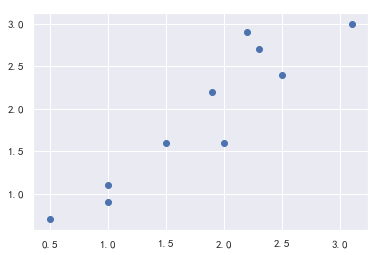

In [4]:
plt.scatter(x,y)

In [5]:
x_mean = np.mean(x)
y_mean = np.mean(y)
x_std = x - x_mean
y_std = y - y_mean
cov_mat = np.cov([x_std,y_std])
print(cov_mat)

[[0.63333333 0.62666667]
 [0.62666667 0.71655556]]


In [6]:
# eigenvectors and eigenvalues for the from the scatter matrix
# 协方差矩阵的特征值和特征向量
eig_val_sc, eig_vec_sc = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,2).T

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print(40 * '-')

Eigenvector 1: 
[[-0.73015574]
 [ 0.68328076]]
Eigenvalue 1 from scatter matrix: 0.04689779356649226
----------------------------------------
Eigenvector 2: 
[[-0.68328076]
 [-0.73015574]]
Eigenvalue 2 from scatter matrix: 1.3029910953223962
----------------------------------------


In [7]:
# 特征向量
eig_vec_sc

array([[-0.73015574, -0.68328076],
       [ 0.68328076, -0.73015574]])

In [8]:
# 特征值
eig_val_sc

array([0.04689779, 1.3029911 ])

In [9]:
# Make a list of (eigenvalue, eigenvector) tuples
# 元组:(特征值,特征向量) list
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
# 排序按特征值从大到小顺序
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print(40 * '-')
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
# 直观地确认列表已通过降低特征值正确排序
for i in eig_pairs:
    print(i[1])

----------------------------------------
[-0.68328076 -0.73015574]
[-0.73015574  0.68328076]


In [10]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(2,1), eig_pairs[1][1].reshape(2,1)))
print(40 * '-')
print('Matrix W: \n', matrix_w)

----------------------------------------
Matrix W: 
 [[-0.68328076 -0.73015574]
 [-0.73015574  0.68328076]]


In [11]:
matrix_w.shape

(2, 2)

In [12]:
x.shape

(10,)

In [13]:
y.shape

(10,)

In [14]:
features = np.vstack([x_std,y_std])
print(features)
features.shape

[[ 0.7  -1.3   0.4   0.1   1.3   0.5   0.2  -0.8  -0.3  -0.8 ]
 [ 0.49 -1.21  0.99  0.29  1.09  0.79 -0.31 -0.81 -0.31 -1.01]]


(2, 10)

In [15]:
transformed = np.dot(matrix_w,features)
print(transformed)

[[-0.83607284  1.77175343 -0.99616649 -0.28007324 -1.68413474 -0.91846341
   0.08969213  1.13805076  0.43133251  1.2840819 ]
 [-0.17630145  0.12243274  0.38438566  0.12513585 -0.20442643  0.17471393
  -0.35784818  0.03066718  0.00722969 -0.10598897]]


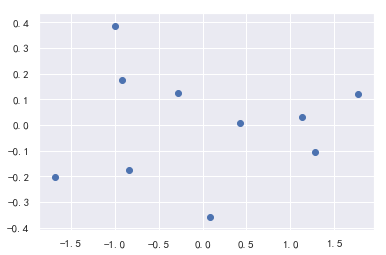

In [16]:
plt.scatter(transformed[0,:],transformed[1,:])

### 自己计算

按照代码中的习惯，矩阵一行为一个点、一个向量，每行一条数据。行为样本，列为特征。

In [17]:
x = np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1])
y = np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])
X = np.hstack([x.reshape(-1, 1), y.reshape(-1, 1)])
X

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1. , 0.9]])

Text(0, 0.5, 'x2')

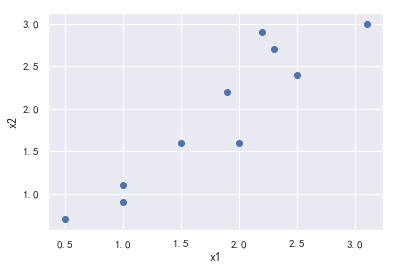

In [18]:
# 原始数据
plt.scatter(X[:,0], X[:,1])
plt.xlabel("x1")
plt.ylabel("x2")

In [19]:
#将 X 的每一列(特征)进行零均值化，即减去这一列的均值
X_std = X - X.mean(axis=0)
X_std

array([[ 0.7 ,  0.49],
       [-1.3 , -1.21],
       [ 0.4 ,  0.99],
       [ 0.1 ,  0.29],
       [ 1.3 ,  1.09],
       [ 0.5 ,  0.79],
       [ 0.2 , -0.31],
       [-0.8 , -0.81],
       [-0.3 , -0.31],
       [-0.8 , -1.01]])

Text(0, 0.5, 'x2')

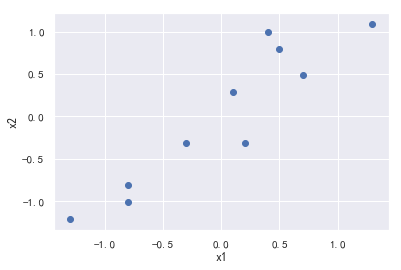

In [20]:
# 零均值化原始数据
plt.scatter(X_std[:,0], X_std[:,1])
plt.xlabel("x1")
plt.ylabel("x2")

Text(0, 0.5, 'x2')

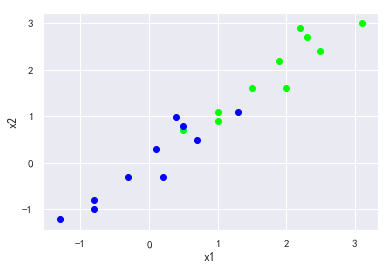

In [21]:
# 就是相当于平移了坐标系，这样就是方便计算、数学推导，不影响。
plt.scatter(X[:,0], X[:,1], c="#00ff00")
plt.scatter(X_std[:,0], X_std[:,1], c="#0000ff")

plt.xlabel("x1")
plt.ylabel("x2")

In [22]:
# 协方差矩阵，没有减1
np.dot(X_std.T, X_std) / X_std.shape[0]

array([[0.57  , 0.564 ],
       [0.564 , 0.6449]])

In [23]:
# 协方差矩阵
std_cov = np.dot(X_std.T, X_std) / (X_std.shape[0] - 1)
std_cov

array([[0.63333333, 0.62666667],
       [0.62666667, 0.71655556]])

In [24]:
# rowvar=False表示每一列为一个向量
# 如果“rowvar”为True（默认值），则每一行表示变量，列中有观察结果。否则，关系被转置：每列表示一个变量，而行包含观察结果。
np.cov(X_std, rowvar=False)

array([[0.63333333, 0.62666667],
       [0.62666667, 0.71655556]])

In [25]:
# 求协方差矩阵的特征值和特征向量，这个也是对称矩阵
# Compute the eigenvalues and right eigenvectors of a square array.
eigenvalues, eigenvectors = np.linalg.eig(std_cov)
print(eigenvalues)
print("-" * 30)
print(eigenvectors)

[0.04689779 1.3029911 ]
------------------------------
[[-0.73015574 -0.68328076]
 [ 0.68328076 -0.73015574]]


下面是对矩阵的特征值和特征向量的验证

In [26]:
eigenvectors[:,0].reshape(-1)

array([-0.73015574,  0.68328076])

In [27]:
# 验证一下
std_cov.dot(eigenvectors[:,0].reshape(-1,1))

array([[-0.03424269],
       [ 0.03204436]])

In [28]:
std_cov.dot(eigenvectors[:,0].reshape(-1))

array([-0.03424269,  0.03204436])

In [29]:
std_cov.dot(eigenvectors[:,0].reshape(-1,1))

array([[-0.03424269],
       [ 0.03204436]])

矩阵 * 特征向量 = 特征向量 * 特征值

In [30]:
# 用矩阵的形式吧，显示的形式更能看出向量
std_cov.dot(eigenvectors[:,0].reshape(-1,1)) / eigenvalues[0]

array([[-0.73015574],
       [ 0.68328076]])

In [31]:
std_cov.dot(eigenvectors[:,1].reshape(-1,1)) / eigenvalues[1]

array([[-0.68328076],
       [-0.73015574]])

In [32]:
# 确实是特征向量和特征值
# 矩阵 * 特征向量矩阵
std_cov.dot(eigenvectors)

array([[-0.03424269, -0.89030874],
       [ 0.03204436, -0.95138643]])

In [33]:
# 特征向量的线性组合
np.hstack([ eigenvectors[:,0].reshape(-1,1)*eigenvalues[0], 
           eigenvectors[:,1].reshape(-1,1)*eigenvalues[1] ] )

array([[-0.03424269, -0.89030874],
       [ 0.03204436, -0.95138643]])

矩阵的特征值和特征向量的验证完毕

In [34]:
# 之前的数据
X_std

array([[ 0.7 ,  0.49],
       [-1.3 , -1.21],
       [ 0.4 ,  0.99],
       [ 0.1 ,  0.29],
       [ 1.3 ,  1.09],
       [ 0.5 ,  0.79],
       [ 0.2 , -0.31],
       [-0.8 , -0.81],
       [-0.3 , -0.31],
       [-0.8 , -1.01]])

In [35]:
# 协方差矩阵
std_cov

array([[0.63333333, 0.62666667],
       [0.62666667, 0.71655556]])

In [36]:
# 特征值、特征向量
eigenvalues, eigenvectors

(array([0.04689779, 1.3029911 ]), array([[-0.73015574, -0.68328076],
        [ 0.68328076, -0.73015574]]))

In [37]:
# 可以看到第二个特征向量为主要的
# 对之前的数据做变换，按照数学中的概念，对原向量做线性变换：
# 把主要的成分放到x轴
transform_X = eigenvectors[:,::-1].dot(X_std.T)
transform_X

array([[-0.83607284,  1.77175343, -0.99616649, -0.28007324, -1.68413474,
        -0.91846341,  0.08969213,  1.13805076,  0.43133251,  1.2840819 ],
       [-0.17630145,  0.12243274,  0.38438566,  0.12513585, -0.20442643,
         0.17471393, -0.35784818,  0.03066718,  0.00722969, -0.10598897]])

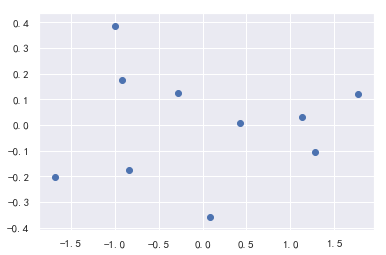

In [38]:
plt.scatter(transform_X[0], transform_X[1])

In [39]:
# 按照代码中的习惯，交换位置即可
X_transform = X_std.dot(eigenvectors[:,::-1])
X_transform

array([[-0.83607284, -0.17630145],
       [ 1.77175343,  0.12243274],
       [-0.99616649,  0.38438566],
       [-0.28007324,  0.12513585],
       [-1.68413474, -0.20442643],
       [-0.91846341,  0.17471393],
       [ 0.08969213, -0.35784818],
       [ 1.13805076,  0.03066718],
       [ 0.43133251,  0.00722969],
       [ 1.2840819 , -0.10598897]])

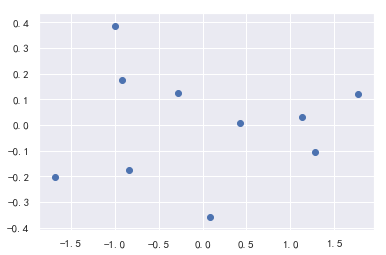

In [40]:
plt.scatter(X_transform[:,0], X_transform[:,1])

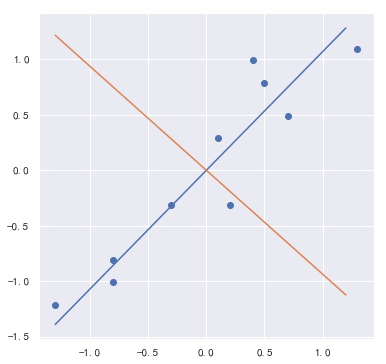

In [41]:
# 根据数学中定义相当于对原点集合做坐标转换
# 画一下最初的数据，和计算出的特征向量

# x轴y轴比例尺相同，不然看着不像垂直
plt.figure(figsize=(6,6))

plt.scatter(X_std[:,0], X_std[:,1])

x1 = np.arange(X_std[:,0].min(), X_std[:,0].max(), 0.1)
eigenvector = eigenvectors[:,1]
y1 = x1/eigenvector[0]*eigenvector[1]
plt.plot(x1, y1)


x1 = np.arange(X_std[:,0].min(), X_std[:,0].max(), 0.1)
eigenvector = eigenvectors[:,0]
y1 = x1/eigenvector[0]*eigenvector[1]
plt.plot(x1, y1)

In [42]:
# 这两个向量是正交的，点积为0
eigenvectors

array([[-0.73015574, -0.68328076],
       [ 0.68328076, -0.73015574]])

降维的实现，就是保留占主要信息的特征。

In [43]:
# np的cumsum函数，做累加
np.cumsum(np.array([1,2,3,4,5,6]))

array([ 1,  3,  6, 10, 15, 21], dtype=int32)

In [44]:
# 累计比例
eigenvalues[::-1].cumsum() / eigenvalues.sum()

array([0.96525803, 1.        ])

In [45]:
# 这样前个特征就包含了96.52%的数据信息
X_transform

array([[-0.83607284, -0.17630145],
       [ 1.77175343,  0.12243274],
       [-0.99616649,  0.38438566],
       [-0.28007324,  0.12513585],
       [-1.68413474, -0.20442643],
       [-0.91846341,  0.17471393],
       [ 0.08969213, -0.35784818],
       [ 1.13805076,  0.03066718],
       [ 0.43133251,  0.00722969],
       [ 1.2840819 , -0.10598897]])

### sklearn PCA

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [47]:
pca = PCA(n_components=0.97, whiten=False)
X_pca = pca.fit_transform(X)
X_pca

array([[-0.83607284, -0.17630145],
       [ 1.77175343,  0.12243274],
       [-0.99616649,  0.38438566],
       [-0.28007324,  0.12513585],
       [-1.68413474, -0.20442643],
       [-0.91846341,  0.17471393],
       [ 0.08969213, -0.35784818],
       [ 1.13805076,  0.03066718],
       [ 0.43133251,  0.00722969],
       [ 1.2840819 , -0.10598897]])

In [48]:
pca = PCA(n_components=0.96, whiten=False)
X_pca = pca.fit_transform(X)
X_pca

array([[-0.83607284],
       [ 1.77175343],
       [-0.99616649],
       [-0.28007324],
       [-1.68413474],
       [-0.91846341],
       [ 0.08969213],
       [ 1.13805076],
       [ 0.43133251],
       [ 1.2840819 ]])

In [49]:
pca = PCA(n_components=0.96, whiten=True)
X_pca = pca.fit_transform(X)
X_pca

array([[-0.73244226],
       [ 1.55214596],
       [-0.87269242],
       [-0.24535838],
       [-1.47538754],
       [-0.80462058],
       [ 0.07857486],
       [ 0.99699024],
       [ 0.37786918],
       [ 1.12492094]])

In [50]:
# whiten为true就多了标准化，好像和上面的差上一点点
pca = PCA(n_components=0.96, whiten=False)
X_pca = pca.fit_transform(X)
StandardScaler().fit_transform(X_pca)

array([[-0.77206193],
       [ 1.6361055 ],
       [-0.91989858],
       [-0.25863044],
       [-1.55519502],
       [-0.84814456],
       [ 0.08282517],
       [ 1.05091999],
       [ 0.39830908],
       [ 1.18577079]])

## PCA对鸢尾花降维

In [51]:
import sklearn.datasets as datasets

In [52]:
iris = datasets.load_iris()
X = iris.data
feature_names = iris.feature_names
y = iris.target
target_names = iris.target_names

### 手动计算

In [53]:
# 自己计算一下

# 零均值化
X_std = X - X.mean(axis=0)

# 协方差矩阵
#std_cov = np.dot(X_std.T, X_std) / (X_std.shape[0] - 1)
std_cov = np.cov(X_std, rowvar=False)
std_cov

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [54]:
# 协方差矩阵的特征值及对应的特征向量
eigenvalues, eigenvectors = np.linalg.eig(std_cov)
eigenvalues, eigenvectors

(array([4.22824171, 0.24267075, 0.0782095 , 0.02383509]),
 array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
        [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
        [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
        [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]]))

In [55]:
# 这个已经从大到小排好序了
eigenvalues / eigenvalues.sum()

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [56]:
np.cumsum(eigenvalues) / eigenvalues.sum()

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

In [57]:
# 取前两个已经百分之97了
X_transform = np.dot(X_std, eigenvectors[:,:2])
X_transform[:6]

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451],
       [-2.28085963, -0.74133045]])

Text(0, 0.5, 'Principal Component 2')

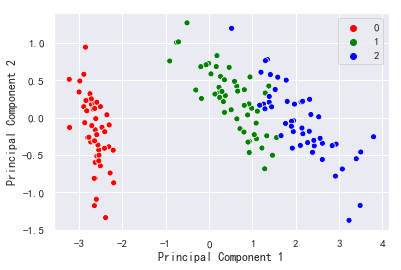

In [58]:
sns.scatterplot(X_transform[:,0], X_transform[:,1], hue=y, palette=["#FF0000", "#008000", "#0000FF"])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Text(0, 0.5, 'Principal Component 4')

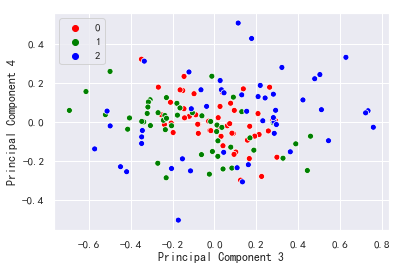

In [59]:
# 后两个包含信息少的成分
X_transform = np.dot(X_std, eigenvectors[:,-2:])
sns.scatterplot(X_transform[:,0], X_transform[:,1], hue=y, palette=["#FF0000", "#008000", "#0000FF"])
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')

计算一下信息熵，肯定主成分的信息熵小，相应的信息增益大。

In [60]:
# 求每个特征的下y的信息熵,和分割条件
def calc_entropy_and_split(feature, y):
    # 某个分割点的信息熵
    def calc_split_entropy(feature_split):
        # 每行的信息熵
        def apply_func(values):
            values = values[values != 0]
            probs = values / values.sum()
            return (probs * -np.log2(probs)).sum()
        
        crosstab = pd.crosstab(feature <= feature_split, y)
        # 每行的概率
        clf_probs = crosstab.sum(axis=1) / crosstab.sum(axis=1).sum()    
        clf_entropys = crosstab.apply(apply_func, axis=1)
        # 总的信息熵
        return np.sum(clf_probs * clf_entropys)
    
    feature_unique = feature.unique()
    feature_unique.sort()
    feature_splits = (feature_unique[1:] + feature_unique[:-1])/2
    # 每个分割点信息熵
    split_entropys = pd.Series(feature_splits).map(calc_split_entropy)
    # Series提示要使用idxmin
    argmin = split_entropys.idxmin()
    return [feature_splits[argmin], split_entropys[argmin]]

# 每个元素是数组
feature_entropys = pd.DataFrame(np.dot(X_std, eigenvectors)).apply(calc_entropy_and_split, result_type='expand', args=(y,)).T
feature_entropys.columns = ["split", "entropy"]
feature_entropys

,split,entropy
0,-1.553145,0.666667
1,0.252531,1.458933
2,0.281489,1.479704
3,0.126705,1.527818


### 使用sklearn PCA

In [61]:
# 0.97前两个特征就够了
pca = PCA(n_components=0.97)
X_pca = pca.fit_transform(X)
X_pca[:6]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045]])

In [62]:
X_transform = np.dot(X_std, eigenvectors[:,:2])
X_transform[:6]

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451],
       [-2.28085963, -0.74133045]])

Text(0, 0.5, 'Principal Component 2')

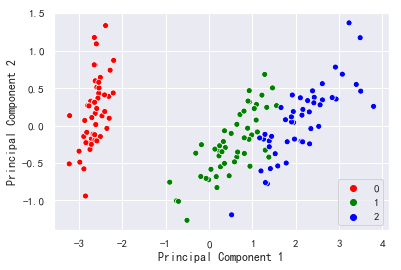

In [63]:
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y, palette=["#FF0000", "#008000", "#0000FF"])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Text(0, 0.5, 'Principal Component 2')

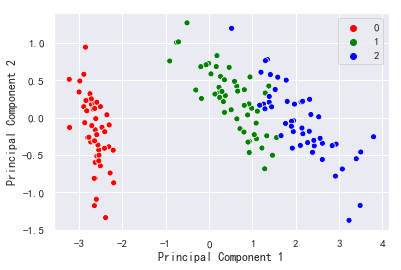

In [64]:
sns.scatterplot(X_transform[:,0], X_transform[:,1], hue=y, palette=["#FF0000", "#008000", "#0000FF"])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [65]:
(np.abs(X_pca) - np.abs(X_transform)).sum()

-6.5520505687644004e-15

In [66]:
# 第二个特征正好差个负号，没影响。
np.hstack([X_pca, X_transform])[:6]

array([[-2.68412563,  0.31939725, -2.68412563, -0.31939725],
       [-2.71414169, -0.17700123, -2.71414169,  0.17700123],
       [-2.88899057, -0.14494943, -2.88899057,  0.14494943],
       [-2.74534286, -0.31829898, -2.74534286,  0.31829898],
       [-2.72871654,  0.32675451, -2.72871654, -0.32675451],
       [-2.28085963,  0.74133045, -2.28085963, -0.74133045]])

Text(0, 0.5, 'Principal Component 2')

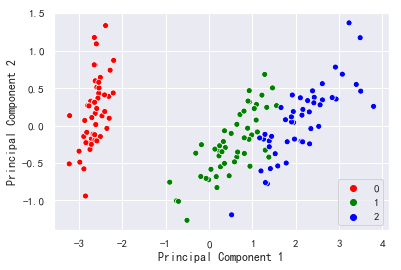

In [67]:
# y值取反就和sklearn的一样了
sns.scatterplot(X_transform[:,0], X_transform[:,1]*-1, hue=y, palette=["#FF0000", "#008000", "#0000FF"])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

### 相关系数
相关系数和协方差

$\rho_{XY}=\frac{Cov(X,Y)}{\sigma_X\sigma_Y}$

就是用X、Y的协方差除以X的标准差和Y的标准差。

所以，相关系数也可以看成协方差：一种剔除了两个变量量纲影响、标准化后的特殊协方差。

既然是一种特殊的协方差，那它：

1、也可以反映两个变量变化时是同向还是反向，如果同向变化就为正，反向变化就为负。

2、由于它是标准化后的协方差，因此更重要的特性来了：它消除了两个变量变化幅度的影响，而只是单纯反应两个变量每单位变化时的相似程度。

In [68]:
"""
np.cov(x)是用于计算协方差矩阵的：
得到的矩阵第i行第j列表示第i个变量和第j个变量的协方差。

np.corrcoef(x)是求相关系数矩阵：
得到的矩阵第i行第j列表示第i个变量和第j个变量的相关系数。
"""
np.corrcoef(X, rowvar=False)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [69]:
# 协方差矩阵
std_cov = np.dot(X_std.T, X_std) / (X_std.shape[0] - 1)
#std_cov = np.cov(X_std, rowvar=False)
std_cov

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])